In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [12]:
df = pd.read_excel("Reporte_Fred.xls",parse_dates=["Fecha"]) #importar excel con datos diarios
df = df.set_index('Fecha') #formato fecha columna "Fecha"
#df.head() 
df.describe()
#quitar 2021 de bdd
fin_2020 = '2020-12-31'
mask = (df.index <= fin_2020)
df = df.loc[mask]

In [13]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Fecha', length=14593, freq=None)

In [14]:
#RESAMPLEAR.TOTAL MENSUAL Y TOTAL ANUAL
df_mensual = df.resample('M').sum()
df_anual= df.resample('Y').sum()
df_mensual.to_csv('Manazo_pp_mensual_1991-2020.csv')
df_anual.to_csv('Manazo_pp_anual_total_1981-2020.csv')
df_anual.describe()

,Puno,Granja Salcedo,Los Uros,Rincon de la Cruz,Mañazo,Umayo,Illpa,Capachica,Cabanillas,Lagunillas,Santa Lucia,Juliaca,Isla Taquile,Los Rosales
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,684.398811,684.398811,703.701878,686.474553,657.130613,576.187760,573.652295,747.559248,615.309786,597.098662,613.719337,805.695753,917.918547,572.710699
std,224.399556,224.399556,223.087453,219.183955,148.012635,187.656982,182.630817,246.266205,202.065201,200.412244,207.134878,253.610420,299.748433,190.151349
min,0.000000,0.000000,0.000000,0.000000,286.370941,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,594.044585,594.044585,617.644103,612.420339,572.634275,499.877935,516.832623,638.777582,543.691091,520.543137,535.399108,721.985605,769.312718,496.103679
50%,724.277218,724.277218,704.265643,695.974288,650.227871,600.088048,584.345817,756.020082,625.204155,627.071702,631.459344,831.203831,953.667489,589.300573
75%,766.094151,766.094151,823.854281,820.440327,733.387994,657.230467,670.507157,890.975306,728.680923,711.016889,735.382233,909.636045,1063.743274,668.169371
max,1133.076890,1133.076890,1115.124540,1082.640076,1000.913100,964.295153,934.086735,1185.380177,926.353313,1049.076421,1060.680122,1342.500061,1425.168798,949.233336


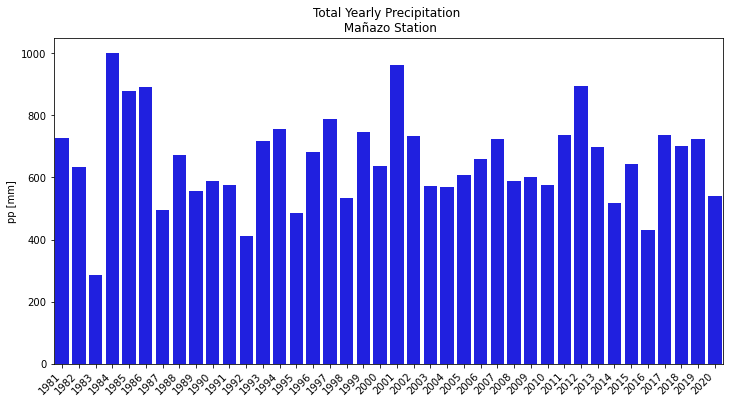

In [15]:
#GRAFICO EN BARRA DE PRECIPITACION ANUAL
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(data=df_anual, x=df_anual.index, y="Mañazo",ax=ax, color="blue")
x_dates= df_anual.index.strftime('%Y').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
ax.set_xlabel("")
ax.set_ylabel("pp [mm]")
plt.title("Total Yearly Precipitation \n Mañazo Station")
#ax.set_xticklabels(df_anual.index, rotation=45)

plt.savefig("pp_anual_manazo.png")
plt.show()

In [17]:
#PROMEDIOS MENSUALES RANGO 1981-2018
m = df_mensual.index.month
result = df_mensual.groupby(m).mean()
# Rename month 1 to January, 2 to February, etc.
result.index = pd.date_range('1/1/2019', '12/1/2019', freq='MS').strftime('%B')

result.to_csv('promedios_mensuales.csv')
result

,Puno,Granja Salcedo,Los Uros,Rincon de la Cruz,Mañazo,Umayo,Illpa,Capachica,Cabanillas,Lagunillas,Santa Lucia,Juliaca,Isla Taquile,Los Rosales
January,152.132486,152.132486,151.356334,155.783211,154.468161,104.928817,97.158207,173.592328,137.461083,152.593226,128.640593,163.793953,207.886542,119.306654
February,144.819680,144.819680,143.459928,129.107570,137.378647,121.256591,133.743401,146.524688,121.152156,121.274867,135.227834,122.653136,186.659441,126.787665
March,120.772176,120.772176,125.077166,120.607574,98.339845,96.816418,110.215926,131.780299,102.012867,103.776564,123.087520,128.276513,165.671417,71.545868
April,56.413641,56.413641,57.120029,44.838118,49.065665,42.124338,41.657430,50.209641,48.418935,40.724277,43.088565,47.964338,75.522283,42.084946
May,7.325596,7.325596,8.119083,7.190486,4.703341,5.793865,4.979583,6.019267,3.897473,4.686529,3.321904,7.494173,15.189376,5.427129
June,3.679455,3.679455,2.769119,2.285485,4.207141,3.070244,2.356241,3.620804,3.573062,3.116649,2.327040,5.228664,4.211456,4.566695
July,2.709255,2.709255,3.050670,4.695505,3.260694,2.385089,1.898572,4.938786,2.366360,1.882240,1.545924,4.205877,5.597037,3.105222
August,9.319837,9.319837,9.983656,10.965365,7.292569,7.203166,5.776198,11.261303,6.831839,4.807914,3.945910,15.059206,10.414491,10.886429
September,20.313341,20.313341,20.061445,30.590543,14.365208,16.170187,16.275318,24.391602,12.698887,6.514579,6.859399,14.214235,37.287042,14.589232
October,39.042267,39.042267,42.344360,38.962224,32.752915,27.546251,40.138203,40.236785,37.107721,22.604144,30.044824,37.581886,47.621414,32.265956


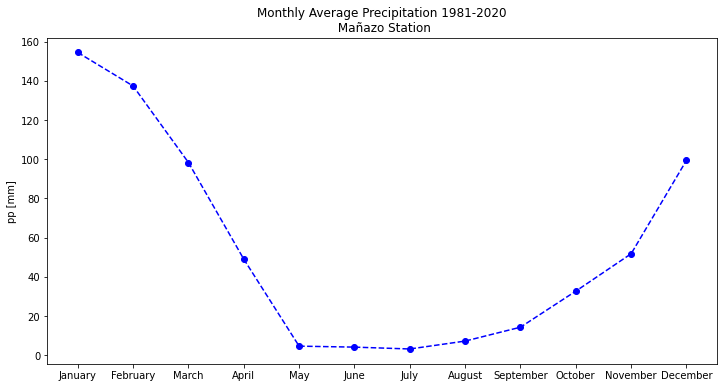

In [18]:
#GRAFICO PROMEDIOS MENSUALES
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(result.index,
        result['Mañazo'],
        color="blue",
        linestyle='dashed', marker="o")
    
plt.title("Monthly Average Precipitation 1981-2020\n Mañazo Station")
#ax.set_xticklabels(df_anual.index, rotation=45)
ax.set_xlabel("")
ax.set_ylabel("pp [mm]")
plt.savefig("pp_mensual_manazo.png")

plt.show()